# SENTIMENT ANALYSIS

In [1]:
#1. VADER
#2. Roberta Petrained Model
#3. Huggingfae Pipeline

In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download("word_tokenize")
nltk.download("post_tag")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index
[nltk_data] Error loading post_tag: Package 'post_tag' not found in
[nltk_data]     index


False

In [3]:
from nltk import word_tokenize
from nltk import pos_tag
from nltk.tag import pos_tag

In [7]:
#reading the pickled "verif_df" table

import pickle

df = pd.read_pickle("ver_df.pkl")
df

,overall,verified,asin,reviewText,summary,length,polarity,polarity2,str_overall
2,5,True,B0019LLEOU,This bowl is a nice size for soup or cereal. I...,Butterfly Meadow bowl,26,0.191667,neutral,5
5,3,True,B000PGZDRY,"Positives: Very soft, hardly any smell and wh...",Good and bad,110,0.034167,neutral,3
6,5,True,B00BGDEH7M,Great Little Clock that projects a nice red im...,Very Happy with the Projection feature.,50,0.343981,positive,5
7,5,True,B00006ICO1,The best thing about this stool is that you fe...,Very safe,44,0.375000,positive,5
12,3,True,B001XCWNNQ,I was hoping this knife would be more like my ...,sharp but cuts uneven slices!,103,0.068803,neutral,3
...,...,...,...,...,...,...,...,...,...
68945,5,True,B00O4XMAU2,The pan is great it just takes long time to co...,The pan is great it just takes long time to co...,32,0.512500,positive,5
68946,5,True,B00FLYWNYQ,I bought this for my daughter. She has had it ...,She has thanked me several times in the past m...,106,0.268182,neutral,5
68947,5,True,B01GJSJBIS,These straws are amazing. I use them for my Te...,These straws are amazing. I use them for my Tea,35,0.533333,positive,5
68950,5,True,B00NOINR1E,Great lantern. The LED candles are on a timer...,Love it!! Highly recommend!,23,0.666667,positive,5


In [8]:
df['reviewText'] = df['reviewText'].str.lower()

In [9]:
df

,overall,verified,asin,reviewText,summary,length,polarity,polarity2,str_overall
2,5,True,B0019LLEOU,this bowl is a nice size for soup or cereal. i...,Butterfly Meadow bowl,26,0.191667,neutral,5
5,3,True,B000PGZDRY,"positives: very soft, hardly any smell and wh...",Good and bad,110,0.034167,neutral,3
6,5,True,B00BGDEH7M,great little clock that projects a nice red im...,Very Happy with the Projection feature.,50,0.343981,positive,5
7,5,True,B00006ICO1,the best thing about this stool is that you fe...,Very safe,44,0.375000,positive,5
12,3,True,B001XCWNNQ,i was hoping this knife would be more like my ...,sharp but cuts uneven slices!,103,0.068803,neutral,3
...,...,...,...,...,...,...,...,...,...
68945,5,True,B00O4XMAU2,the pan is great it just takes long time to co...,The pan is great it just takes long time to co...,32,0.512500,positive,5
68946,5,True,B00FLYWNYQ,i bought this for my daughter. she has had it ...,She has thanked me several times in the past m...,106,0.268182,neutral,5
68947,5,True,B01GJSJBIS,these straws are amazing. i use them for my te...,These straws are amazing. I use them for my Tea,35,0.533333,positive,5
68950,5,True,B00NOINR1E,great lantern. the led candles are on a timer...,Love it!! Highly recommend!,23,0.666667,positive,5


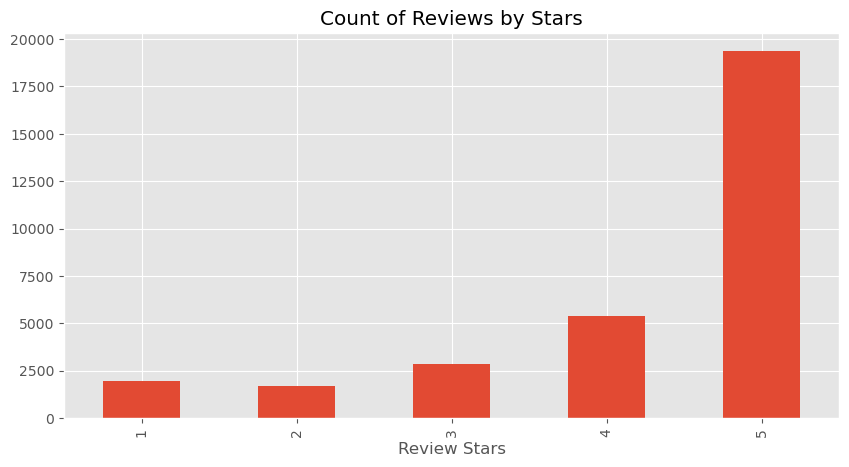

In [10]:
#EDA

ax = df["overall"].value_counts().sort_index().plot(kind = 'bar', title = "Count of Reviews by Stars", figsize = (10,5))
ax.set_xlabel("Review Stars")
plt.show()

In [11]:
## Basic NLTK

example = df["reviewText"]
example = example.reset_index(drop=True)
example = example[50]

In [12]:
nltk.word_tokenize(example)

['compact',
 ',',
 'powerful',
 'vacuum',
 'that',
 'is',
 'just',
 'the',
 'right',
 'size',
 'for',
 'my',
 'loft',
 'studio',
 '(',
 'approx',
 '720',
 ')',
 '.',
 'the',
 'wall-mounted',
 'option',
 'is',
 'great',
 'for',
 'a',
 'quick',
 'grab',
 'and',
 'vac',
 'and',
 'keeping',
 'up',
 'on',
 'thorough',
 'sweeps',
 'regularly',
 '.',
 'the',
 'first',
 'pass',
 'through',
 ',',
 'i',
 'had',
 'to',
 'empty',
 'the',
 'trap',
 '3',
 'times',
 'while',
 'vacuuming',
 ',',
 'so',
 'i',
 'was',
 'worried',
 'the',
 'capacity',
 'was',
 'too',
 'small',
 '.',
 'a',
 'thorough',
 'vacuum',
 'now',
 'barely',
 'fills',
 'reservoir',
 'halfway',
 '.',
 'eliminate',
 'dust',
 'bunnies',
 'and',
 'crumbs',
 'for',
 'good',
 '.']

In [13]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['compact',
 ',',
 'powerful',
 'vacuum',
 'that',
 'is',
 'just',
 'the',
 'right',
 'size']

In [14]:
#now I have tokens and part of speech values

nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('compact', 'NN'),
 (',', ','),
 ('powerful', 'JJ'),
 ('vacuum', 'NN'),
 ('that', 'WDT'),
 ('is', 'VBZ'),
 ('just', 'RB'),
 ('the', 'DT'),
 ('right', 'JJ'),
 ('size', 'NN'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('loft', 'JJ'),
 ('studio', 'NN'),
 ('(', '('),
 ('approx', 'IN'),
 ('720', 'CD'),
 (')', ')'),
 ('.', '.'),
 ('the', 'DT'),
 ('wall-mounted', 'JJ'),
 ('option', 'NN'),
 ('is', 'VBZ'),
 ('great', 'JJ'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('quick', 'JJ'),
 ('grab', 'NN'),
 ('and', 'CC'),
 ('vac', 'NN'),
 ('and', 'CC'),
 ('keeping', 'VBG'),
 ('up', 'RP'),
 ('on', 'IN'),
 ('thorough', 'JJ'),
 ('sweeps', 'NNS'),
 ('regularly', 'RB'),
 ('.', '.'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('pass', 'NN'),
 ('through', 'IN'),
 (',', ','),
 ('i', 'NN'),
 ('had', 'VBD'),
 ('to', 'TO'),
 ('empty', 'VB'),
 ('the', 'DT'),
 ('trap', 'NN'),
 ('3', 'CD'),
 ('times', 'NNS'),
 ('while', 'IN'),
 ('vacuuming', 'VBG'),
 (',', ','),
 ('so', 'IN'),
 ('i', 'NN'),
 ('was', 'VBD'),
 ('worried', 'VBN'),
 ('the', 'DT'

In [15]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('compact', 'NN'),
 (',', ','),
 ('powerful', 'JJ'),
 ('vacuum', 'NN'),
 ('that', 'WDT'),
 ('is', 'VBZ'),
 ('just', 'RB'),
 ('the', 'DT'),
 ('right', 'JJ'),
 ('size', 'NN')]

In [16]:
#groups them into chunks of text
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [17]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  compact/NN
  ,/,
  powerful/JJ
  vacuum/NN
  that/WDT
  is/VBZ
  just/RB
  the/DT
  right/JJ
  size/NN
  for/IN
  my/PRP$
  loft/JJ
  studio/NN
  (/(
  approx/IN
  720/CD
  )/)
  ./.
  the/DT
  wall-mounted/JJ
  option/NN
  is/VBZ
  great/JJ
  for/IN
  a/DT
  quick/JJ
  grab/NN
  and/CC
  vac/NN
  and/CC
  keeping/VBG
  up/RP
  on/IN
  thorough/JJ
  sweeps/NNS
  regularly/RB
  ./.
  the/DT
  first/JJ
  pass/NN
  through/IN
  ,/,
  i/NN
  had/VBD
  to/TO
  empty/VB
  the/DT
  trap/NN
  3/CD
  times/NNS
  while/IN
  vacuuming/VBG
  ,/,
  so/IN
  i/NN
  was/VBD
  worried/VBN
  the/DT
  capacity/NN
  was/VBD
  too/RB
  small/JJ
  ./.
  a/DT
  thorough/JJ
  vacuum/NN
  now/RB
  barely/RB
  fills/VBZ
  reservoir/JJ
  halfway/NN
  ./.
  eliminate/VB
  dust/JJ
  bunnies/NNS
  and/CC
  crumbs/NNS
  for/IN
  good/JJ
  ./.)


# VADER

In [18]:
#Valence Aware Dictionary and Sentiment Reasoner
#it does not account for relationship words
#use bag of words and remove stop words

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
sia

In [21]:
#I have just added a sentence as an example... compound score: 0.6468

sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [22]:
#Trying a second example... compound score: -0.6588

sia.polarity_scores("This is the worst thing ever!")

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [23]:
#Trying on the example used above... compound score: 0.9728

sia.polarity_scores(example)

{'neg': 0.086, 'neu': 0.786, 'pos': 0.128, 'compound': 0.6395}

In [24]:
#Run the polarity score on the entire dataset()

df

,overall,verified,asin,reviewText,summary,length,polarity,polarity2,str_overall
2,5,True,B0019LLEOU,this bowl is a nice size for soup or cereal. i...,Butterfly Meadow bowl,26,0.191667,neutral,5
5,3,True,B000PGZDRY,"positives: very soft, hardly any smell and wh...",Good and bad,110,0.034167,neutral,3
6,5,True,B00BGDEH7M,great little clock that projects a nice red im...,Very Happy with the Projection feature.,50,0.343981,positive,5
7,5,True,B00006ICO1,the best thing about this stool is that you fe...,Very safe,44,0.375000,positive,5
12,3,True,B001XCWNNQ,i was hoping this knife would be more like my ...,sharp but cuts uneven slices!,103,0.068803,neutral,3
...,...,...,...,...,...,...,...,...,...
68945,5,True,B00O4XMAU2,the pan is great it just takes long time to co...,The pan is great it just takes long time to co...,32,0.512500,positive,5
68946,5,True,B00FLYWNYQ,i bought this for my daughter. she has had it ...,She has thanked me several times in the past m...,106,0.268182,neutral,5
68947,5,True,B01GJSJBIS,these straws are amazing. i use them for my te...,These straws are amazing. I use them for my Tea,35,0.533333,positive,5
68950,5,True,B00NOINR1E,great lantern. the led candles are on a timer...,Love it!! Highly recommend!,23,0.666667,positive,5


In [25]:
df = df.assign(id=range(len(df)))
df = df.reset_index(drop=True)
df

,overall,verified,asin,reviewText,summary,length,polarity,polarity2,str_overall,id
0,5,True,B0019LLEOU,this bowl is a nice size for soup or cereal. i...,Butterfly Meadow bowl,26,0.191667,neutral,5,0
1,3,True,B000PGZDRY,"positives: very soft, hardly any smell and wh...",Good and bad,110,0.034167,neutral,3,1
2,5,True,B00BGDEH7M,great little clock that projects a nice red im...,Very Happy with the Projection feature.,50,0.343981,positive,5,2
3,5,True,B00006ICO1,the best thing about this stool is that you fe...,Very safe,44,0.375000,positive,5,3
4,3,True,B001XCWNNQ,i was hoping this knife would be more like my ...,sharp but cuts uneven slices!,103,0.068803,neutral,3,4
...,...,...,...,...,...,...,...,...,...,...
31193,5,True,B00O4XMAU2,the pan is great it just takes long time to co...,The pan is great it just takes long time to co...,32,0.512500,positive,5,31193
31194,5,True,B00FLYWNYQ,i bought this for my daughter. she has had it ...,She has thanked me several times in the past m...,106,0.268182,neutral,5,31194
31195,5,True,B01GJSJBIS,these straws are amazing. i use them for my te...,These straws are amazing. I use them for my Tea,35,0.533333,positive,5,31195
31196,5,True,B00NOINR1E,great lantern. the led candles are on a timer...,Love it!! Highly recommend!,23,0.666667,positive,5,31196


In [26]:
#Run the polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row["reviewText"]
    myid = row ["id"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/31198 [00:00<?, ?it/s]

In [27]:
#now we have a dictionary with each id negative, neutral and positive score of each

res

{0: {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.6486},
 1: {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.9427},
 2: {'neg': 0.039, 'neu': 0.673, 'pos': 0.287, 'compound': 0.9337},
 3: {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.7964},
 4: {'neg': 0.103, 'neu': 0.742, 'pos': 0.155, 'compound': 0.8067},
 5: {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.9426},
 6: {'neg': 0.104, 'neu': 0.763, 'pos': 0.132, 'compound': 0.4201},
 7: {'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9482},
 8: {'neg': 0.049, 'neu': 0.905, 'pos': 0.046, 'compound': 0.1002},
 9: {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.9938},
 10: {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.6705},
 11: {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.6369},
 12: {'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.3612},
 13: {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.9052},
 14: {'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compound': 0.6369

In [28]:
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,...,31188,31189,31190,31191,31192,31193,31194,31195,31196,31197
neg,0.0000,0.0000,0.0390,0.0000,0.1030,0.0000,0.1040,0.0000,0.0490,0.0000,...,0.0000,0.0000,0.0430,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260
neu,0.8060,0.8560,0.6730,0.8460,0.7420,0.5690,0.7630,0.7360,0.9050,0.6510,...,0.9070,0.4550,0.7450,1.0,0.7880,0.6420,0.8840,0.7950,0.6420,0.7940
pos,0.1940,0.1440,0.2870,0.1540,0.1550,0.4310,0.1320,0.2640,0.0460,0.3490,...,0.0930,0.5450,0.2120,0.0,0.2120,0.3580,0.1160,0.2050,0.3580,0.1790
compound,0.6486,0.9427,0.9337,0.7964,0.8067,0.9426,0.4201,0.9482,0.1002,0.9938,...,0.5604,0.9697,0.8626,0.0,0.6865,0.9081,0.9141,0.8402,0.8908,0.9202


In [29]:
#Flipping the table

pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.000,0.806,0.194,0.6486
1,0.000,0.856,0.144,0.9427
2,0.039,0.673,0.287,0.9337
3,0.000,0.846,0.154,0.7964
4,0.103,0.742,0.155,0.8067
...,...,...,...,...
31193,0.000,0.642,0.358,0.9081
31194,0.000,0.884,0.116,0.9141
31195,0.000,0.795,0.205,0.8402
31196,0.000,0.642,0.358,0.8908


In [30]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {"index": "id"})
vaders = vaders.merge (df, how = "left")

In [31]:
vaders

,id,neg,neu,pos,compound,overall,verified,asin,reviewText,summary,length,polarity,polarity2,str_overall
0,0,0.000,0.806,0.194,0.6486,5,True,B0019LLEOU,this bowl is a nice size for soup or cereal. i...,Butterfly Meadow bowl,26,0.191667,neutral,5
1,1,0.000,0.856,0.144,0.9427,3,True,B000PGZDRY,"positives: very soft, hardly any smell and wh...",Good and bad,110,0.034167,neutral,3
2,2,0.039,0.673,0.287,0.9337,5,True,B00BGDEH7M,great little clock that projects a nice red im...,Very Happy with the Projection feature.,50,0.343981,positive,5
3,3,0.000,0.846,0.154,0.7964,5,True,B00006ICO1,the best thing about this stool is that you fe...,Very safe,44,0.375000,positive,5
4,4,0.103,0.742,0.155,0.8067,3,True,B001XCWNNQ,i was hoping this knife would be more like my ...,sharp but cuts uneven slices!,103,0.068803,neutral,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31193,31193,0.000,0.642,0.358,0.9081,5,True,B00O4XMAU2,the pan is great it just takes long time to co...,The pan is great it just takes long time to co...,32,0.512500,positive,5
31194,31194,0.000,0.884,0.116,0.9141,5,True,B00FLYWNYQ,i bought this for my daughter. she has had it ...,She has thanked me several times in the past m...,106,0.268182,neutral,5
31195,31195,0.000,0.795,0.205,0.8402,5,True,B01GJSJBIS,these straws are amazing. i use them for my te...,These straws are amazing. I use them for my Tea,35,0.533333,positive,5
31196,31196,0.000,0.642,0.358,0.8908,5,True,B00NOINR1E,great lantern. the led candles are on a timer...,Love it!! Highly recommend!,23,0.666667,positive,5


In [32]:
#Now we have sentiment score and metadata

vaders.head()

,id,neg,neu,pos,compound,overall,verified,asin,reviewText,summary,length,polarity,polarity2,str_overall
0,0,0.000,0.806,0.194,0.6486,5,True,B0019LLEOU,this bowl is a nice size for soup or cereal. i...,Butterfly Meadow bowl,26,0.191667,neutral,5
1,1,0.000,0.856,0.144,0.9427,3,True,B000PGZDRY,"positives: very soft, hardly any smell and wh...",Good and bad,110,0.034167,neutral,3
2,2,0.039,0.673,0.287,0.9337,5,True,B00BGDEH7M,great little clock that projects a nice red im...,Very Happy with the Projection feature.,50,0.343981,positive,5
3,3,0.000,0.846,0.154,0.7964,5,True,B00006ICO1,the best thing about this stool is that you fe...,Very safe,44,0.375000,positive,5
4,4,0.103,0.742,0.155,0.8067,3,True,B001XCWNNQ,i was hoping this knife would be more like my ...,sharp but cuts uneven slices!,103,0.068803,neutral,3


Plot VADER results:

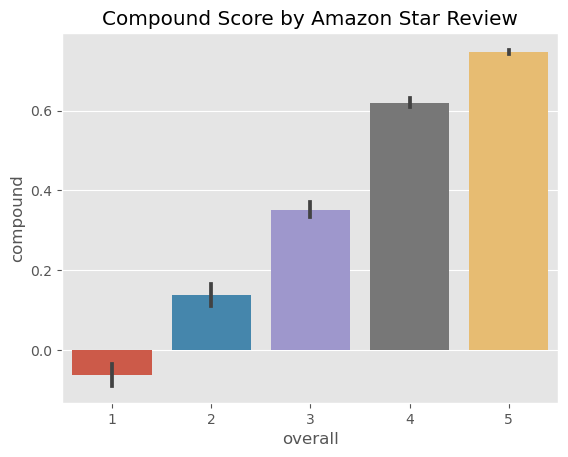

In [33]:
#Now I want to see if the score is correlated with the text in terms of being pos, neg, or neu (by plotting it)

ax = sns.barplot(data=vaders, x = "overall", y = "compound")
ax.set_title ("Compound Score by Amazon Star Review")
plt.show()

<AxesSubplot:xlabel='overall', ylabel='pos'>

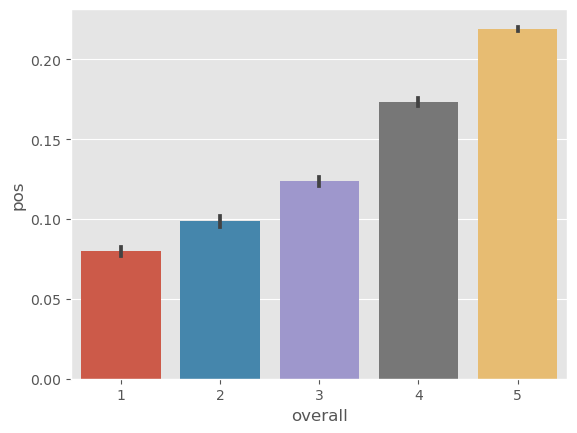

In [34]:
#Just the positives

sns.barplot(data = vaders, x = "overall", y = "pos")

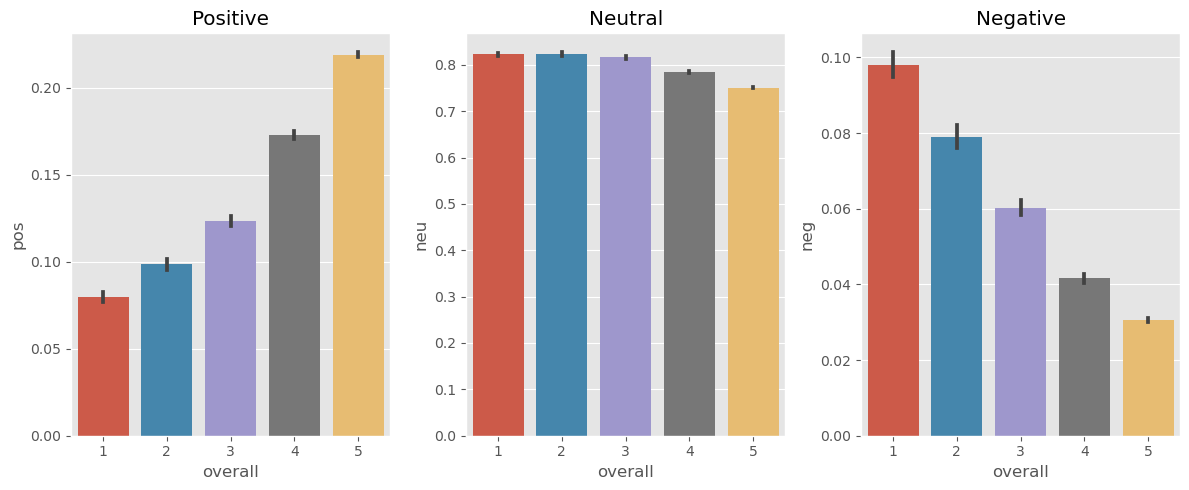

In [35]:
#Now the positives, negatives, neutral

fig, axs = plt.subplots(1, 3, figsize = (12, 5))
sns.barplot(data = vaders, x = "overall", y = "pos", ax=axs[0])
sns.barplot(data = vaders, x = "overall", y = "neu", ax=axs[1])
sns.barplot(data = vaders, x = "overall", y = "neg", ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# ROBERTA PRETRAINED MODEL

In [36]:
#This model is better
 
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [37]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.0436, 0.6427, 0.8420],
        [0.0549, 0.8355, 0.9413],
        [0.4535, 0.0934, 0.1659],
        [0.1585, 0.4521, 0.8396],
        [0.3276, 0.3555, 0.6493]])


In [38]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

In [39]:
from transformers import RobertaTokenizer

In [40]:
#Transfer learning

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [41]:
#VADER results on example

print(example)
sia.polarity_scores(example)

compact, powerful vacuum that is just the right size for my loft studio (approx 720). the wall-mounted option is great for a quick grab and vac and keeping up on thorough sweeps regularly. the first pass through, i had to empty the trap 3 times while vacuuming, so i was worried the capacity was too small. a thorough vacuum now barely fills reservoir halfway. eliminate dust bunnies and crumbs for good.


{'neg': 0.086, 'neu': 0.786, 'pos': 0.128, 'compound': 0.6395}

In [42]:
#Run Roberta Model

tokenizer(example, return_tensors = 'pt')

{'input_ids': tensor([[    0, 11828,  7257,     6,  2247, 15702,    14,    16,    95,     5,
           235,  1836,    13,   127, 27751,  4535,    36,  3340, 31726, 26180,
           322,     5,  2204,    12, 31034,  1973,    16,   372,    13,    10,
          2119,  6895,     8, 18721,     8,  2396,    62,    15, 10675, 34752,
          4595,     4,     5,    78,  1323,   149,     6,   939,    56,     7,
          5802,     5, 14653,   155,   498,   150, 18721,   257, 20016,     6,
            98,   939,    21,  3915,     5,  2148,    21,   350,   650,     4,
            10, 10675, 15702,   122,  6254, 22999, 22039, 13177,     4,  7677,
          8402,   741, 17424,   918,     8,  3977, 29123,    13,   205,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [43]:
#Run Roberta Model

encoded_text = tokenizer(example, return_tensors = 'pt')
output = model (**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.2561,  0.0679,  1.3842]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [44]:
#from tensor to numpy, so I can store it

#Run Roberta Model

encoded_text = tokenizer(example, return_tensors = 'pt')
output = model (**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.0532602 , 0.20017087, 0.7465689 ], dtype=float32)

In [45]:
#So, these are the negative, neutral, and positive scores on that text (above)

In [46]:
#Now I'm making a dictionary to store these

encoded_text = tokenizer(example, return_tensors = 'pt')
output = model (**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {"roberta_neg": scores[0],
              "roberta_neu": scores[1],
              "roberta_pos": scores[2]}
print(scores_dict)

{'roberta_neg': 0.0532602, 'roberta_neu': 0.20017087, 'roberta_pos': 0.7465689}


In [47]:
#So, the Roberta model thinks this score is positive!!! 

#VADER MODEL: 'neg': 0.0, 'neu': 0.433, 'pos': 0.567
#ROBERTA MODEL: 'neg': 0.0011605723, 'roberta_neu': 0.008326104, 'roberta_pos': 0.9905133

In [48]:
#Now I will run the Roberta model on the entire dataset

def polarity_scores_roberta(example):
    encoded_text = tokenizer (example, return_tensors = "pt")
    output = model (**encoded_text)
    scores = output[0][0].detach().numpy()
    #scores = sofmax(scores)
    scores_dict = {"roberta_neg": scores[0],
              "roberta_neu": scores[1],
              "roberta_pos": scores[2]}
    return scores_dict

In [49]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row["reviewText"]
    myid = row ["id"]
    vader_result = sia.polarity_scores(text)
    
    roberta_result = polarity_scores_roberta(text)
    break

  0%|          | 0/31198 [00:00<?, ?it/s]

In [50]:
vader_result

{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.6486}

In [51]:
roberta_result

{'roberta_neg': -3.1642184, 'roberta_neu': 0.10160725, 'roberta_pos': 3.517799}

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row["reviewText"]
    myid = row ["id"]
    vader_result = sia.polarity_scores(text)
    
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result, **roberta_result}
    break

In [54]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.806,
 'vader_pos': 0.194,
 'vader_compound': 0.6486,
 'roberta_neg': -3.1642184,
 'roberta_neu': 0.10160725,
 'roberta_pos': 3.517799}

#expected to break

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row["reviewText"]
        myid = row ["id"]
        vader_result = sia.polarity_scores(text)
    
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [62]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {"index": "id"})
results_df = results_df.merge (df, how = "left")

In [63]:
results_df.head()

,overall,verified,asin,reviewText,summary,length,polarity,polarity2,str_overall,id


In [64]:
# Compare scores between models

results_df.columns

Index(['overall', 'verified', 'asin', 'reviewText', 'summary', 'length',
       'polarity', 'polarity2', 'str_overall', 'id'],
      dtype='object')

KeyError: 'vader_neg'

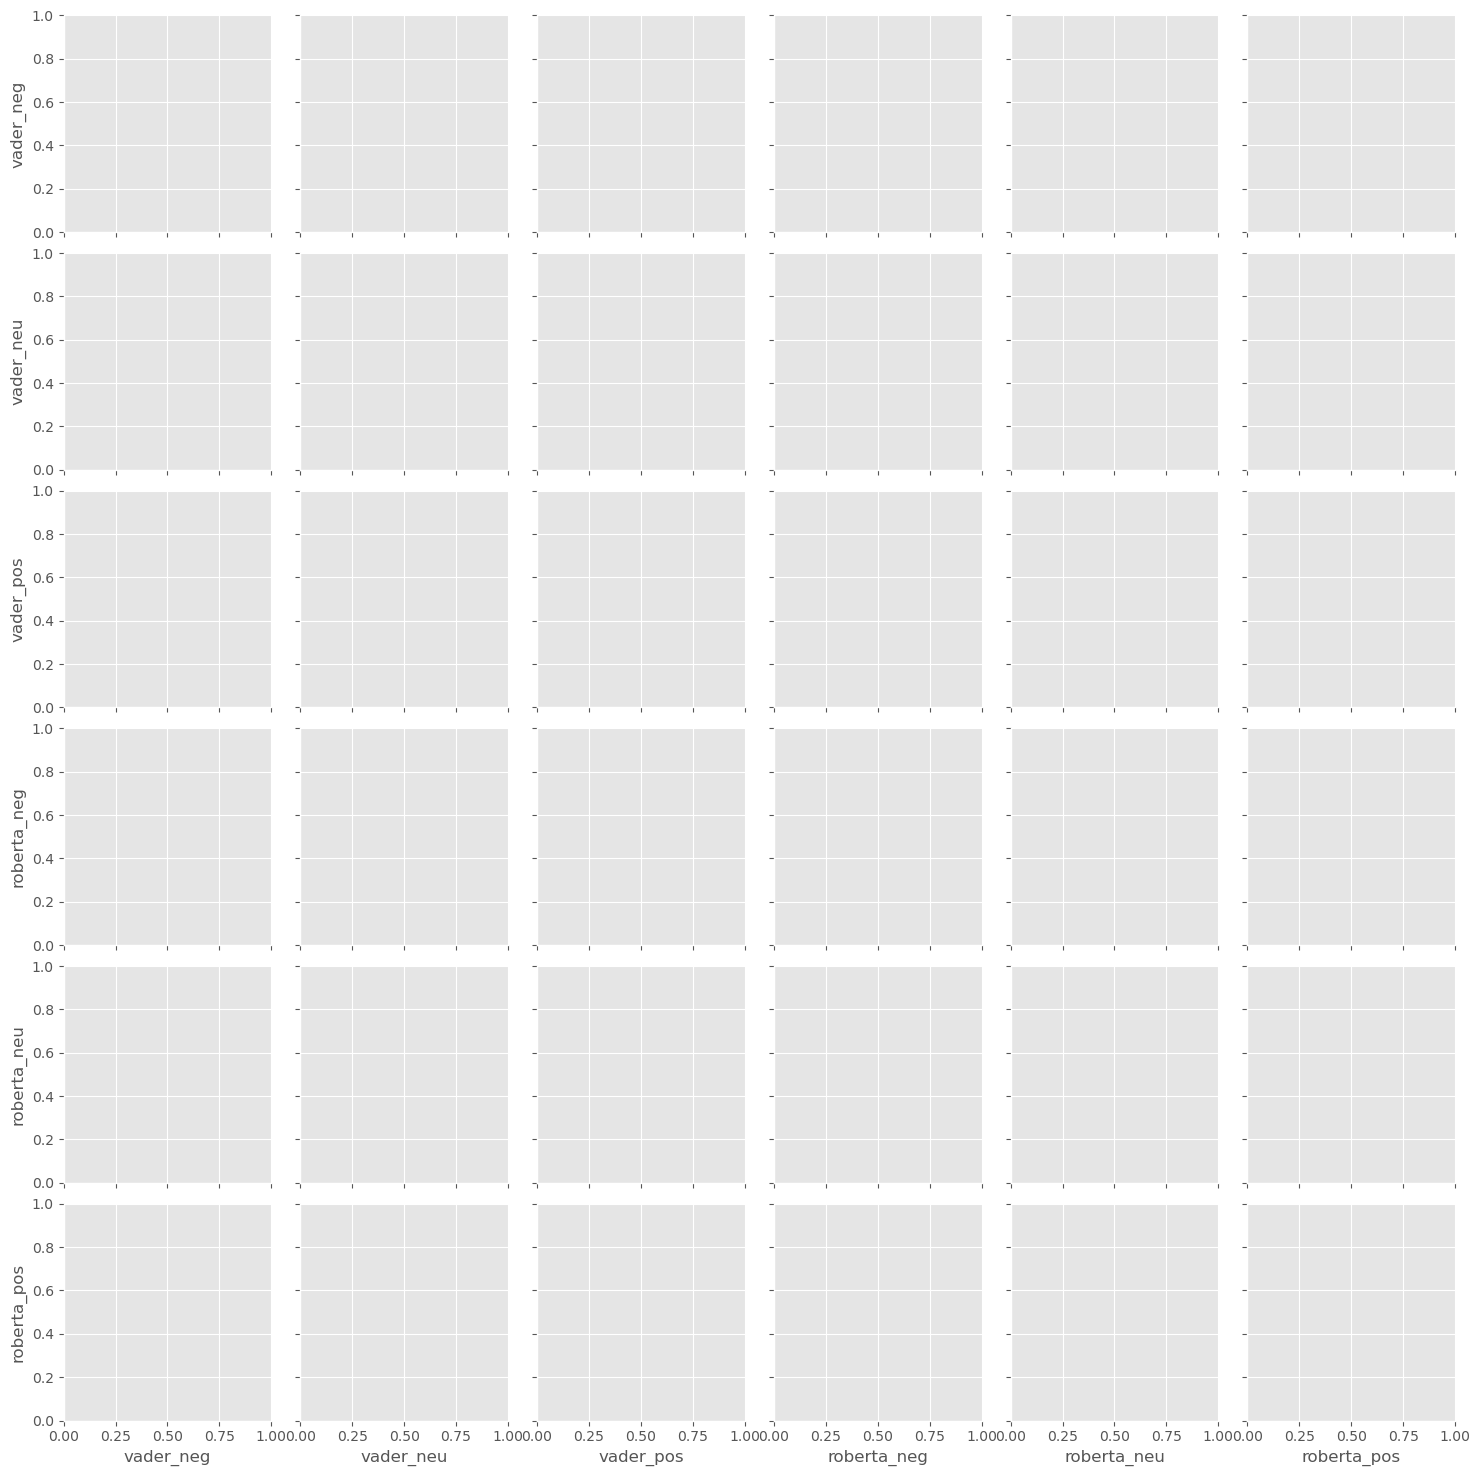

In [65]:
# Combine and compare scores between models

sns.pairplot(data = results_df, vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos' ], 
             hue = 'overall', 
             palette = 'tab10')
plt.show()

In [ ]:
# The Roberta model seems more confident in separating the scores between pos, neu, and neg (their seapration's clearer)

In [60]:
# Now review some examples:
# Roberta model "POSITIVE" reviews

results_df.query('overall == 1')\
    .sort_values('roberta_pos', ascending = False)["reviewText"].values[0]

KeyError: 'roberta_pos'

In [ ]:
# Now review some examples:
# Vader model, which only takes the bag of words, takes every word individually
# Vader model "POSITIVE" reviews

results_df.query('overall == 1')\
    .sort_values('vader_pos', ascending = False)["reviewText"].values[0]

In [ ]:
# negativ sentiment 5-star review 
# Roberta model

results_df.query('overall == 5')\
    .sort_values('roberta_neg', ascending = False)["reviewText"].values[0]

In [ ]:
# Insights: this seems to have a negative sentiment, but a positive review. Roberta scores it as negative.

In [ ]:
# negativ sentiment 5-star review
# Vader model

results_df.query('overall == 5')\
    .sort_values('vader_neg', ascending = False)["reviewText"].values[0]

In [ ]:
# Insights: this seems to have a positive sentiment, and a positive review, but Vader scores it as being negative

# The transformers Pipeline

In [ ]:
from transformers import pipeline

In [ ]:
sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('I love sentiment analysisI really') # positive with a very high confidence

In [ ]:
sent_pipeline('It could have been better') # negative with a very high confidence

In [ ]:
#This is amazing!!!

In [ ]:
#Example of text from the internet:

In [ ]:
sent_pipeline("She sat waiting. Like most things in her life this was just another thing she couldn't control. Life, she felt, was something that just happened to her. As hard as she fought to stand still, life took her by the hand, dragged her along and pulled her in. She was constantly left dealing with the aftermath of the newest thing life had swept her up in and all the fight she had in her was just about gone.")

In [ ]:
short_df = df[df['length'] < 512] 
short_df.shape

In [ ]:
#Trying the Pipeline model with the first row only - FUNCIONOU - somente com a primeira review

short_df_sample = short_df.iloc[0] ["reviewText"]
short_df_sample

In [ ]:
#Trying the Pipeline model with the first row only

sent_pipeline(short_df_sample)

In [ ]:
#Pipeline ends here!

In [ ]:
#TENTANDO APLICAR A MINHA DF INTEIRA NO PIPELINE - NÃO FUNCIONOU